<a href="https://colab.research.google.com/github/eraj256/Datascience_project-/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
##IMPORT IMPORTANT LIBRARIES
import pandas
import numpy
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
#UPLOAD DATASET FILE
df = pandas.read_csv("/content/car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
#EDA
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.shape

(301, 9)

In [17]:
print(df.duplicated().sum)


<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool>


In [21]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


***convert object types into numeric***

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# correlation matrix
corr = df.corr(numeric_only=True)
print(corr)

                   Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
Year           1.000000       0.236141      -0.047192   -0.524342  -0.053643   
Selling_Price  0.236141       1.000000       0.878914    0.029187  -0.509467   
Present_Price -0.047192       0.878914       1.000000    0.203618  -0.440493   
Driven_kms    -0.524342       0.029187       0.203618    1.000000  -0.166801   
Fuel_Type     -0.053643      -0.509467      -0.440493   -0.166801   1.000000   
Selling_type  -0.039896      -0.550724      -0.512121   -0.101419   0.352415   
Transmission   0.000394      -0.367128      -0.348776   -0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008058    0.089216   0.055705   

               Selling_type  Transmission     Owner  
Year              -0.039896      0.000394 -0.182104  
Selling_Price     -0.550724     -0.367128 -0.088344  
Present_Price     -0.512121     -0.348776  0.008058  
Driven_kms        -0.101419     -0.162510  0.089216  
Fuel_Type

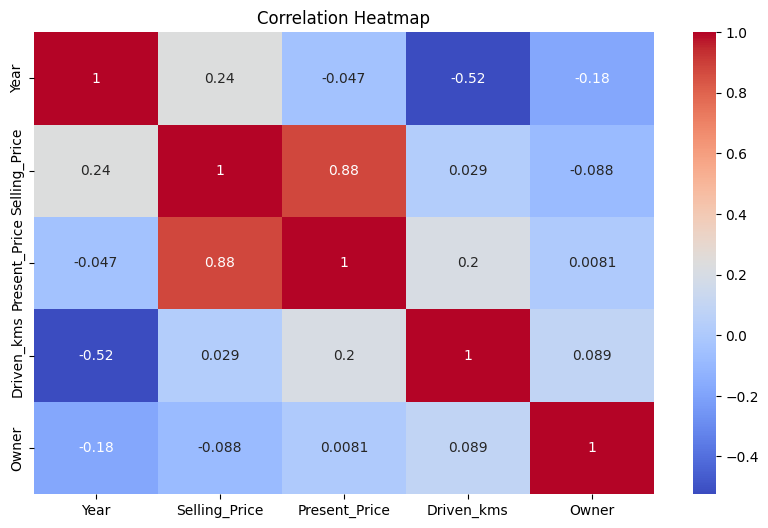

In [42]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

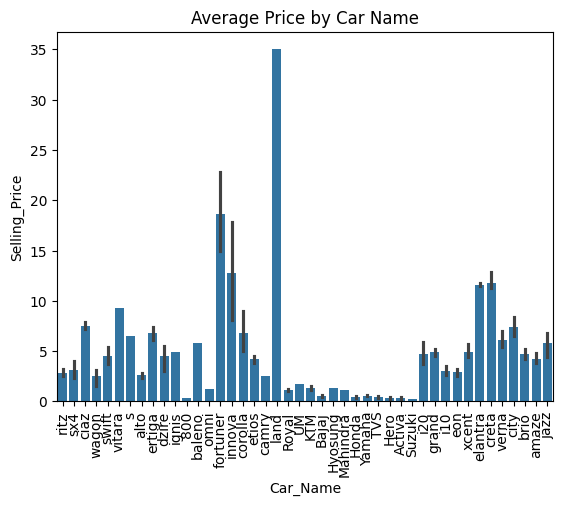

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Car_Name'] = df['Car_Name'].str.split(' ').str[0]
sns.barplot(x='Car_Name', y='Selling_Price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Car Name')
plt.show()

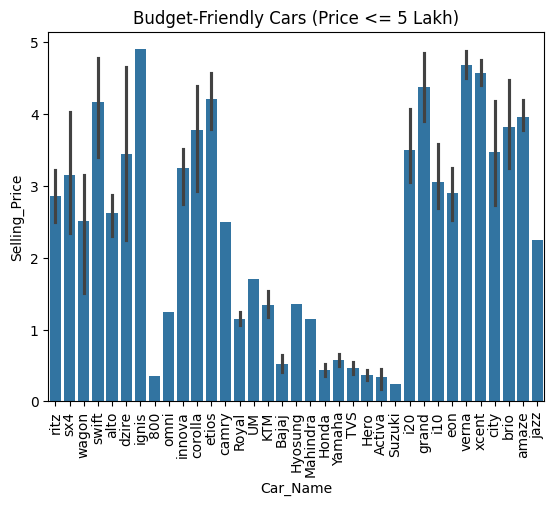

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

budget = df[df['Selling_Price'] <= 5]

sns.barplot(x='Car_Name', y='Selling_Price', data=budget)
plt.xticks(rotation=90)
plt.title('Budget-Friendly Cars (Price <= 5 Lakh)')
plt.show()


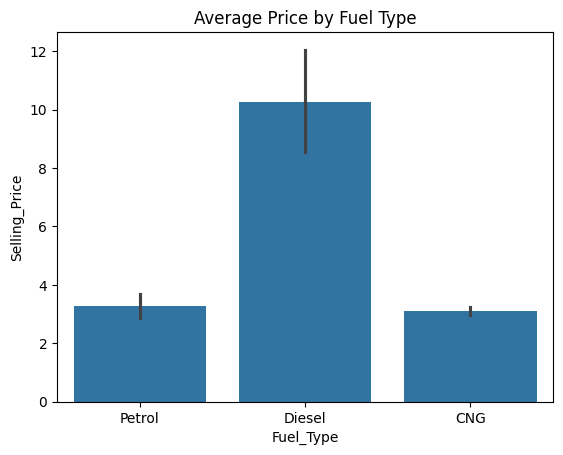

In [43]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Average Price by Fuel Type')
plt.show()

In this graph, the dots don’t lie exactly on a straight line, but they do follow a clear trend. You can see that when the Present Price decreases, the Selling Price also tends to decrease, and as the Present Price increases, the Selling Price generally increases as well.

This relationship is called positive correlation. It means there is a strong positive connection between the two variables (Present Price and Selling Price), but the relationship isn’t perfect. Other factors—such as the car's model year, mileage, fuel type, etc.—are also affecting the Selling Price, which is why the dots are scattered slightly around the line.

In short, the fact that the dots don’t form a perfect line means the relationship isn’t exact, but there’s still a clear trend showing that Present Price and Selling Price are positively related and tend to increase together

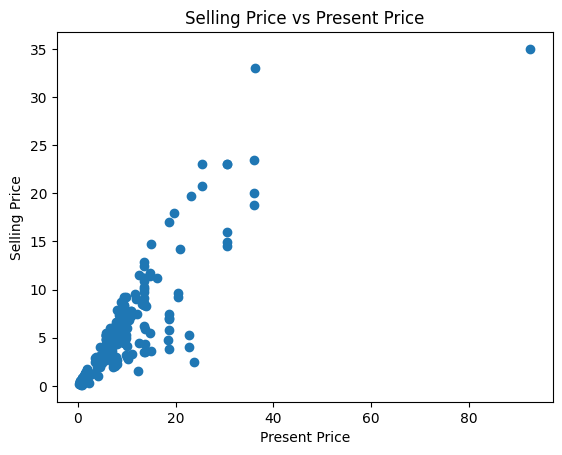

In [46]:
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Present Price')
plt.show()

**MODEL TRAINING**

In [59]:
# Driven_kms owner is drop because it had least impact on price
X=df[['Year','Present_Price','Fuel_Type','Selling_type','Transmission']]
y=df['Selling_Price']
print(X)
print(y)

     Year  Present_Price  Fuel_Type  Selling_type  Transmission
0    2014           5.59          2             0             1
1    2013           9.54          1             0             1
2    2017           9.85          2             0             1
3    2011           4.15          2             0             1
4    2014           6.87          1             0             1
..    ...            ...        ...           ...           ...
296  2016          11.60          1             0             1
297  2015           5.90          2             0             1
298  2009          11.00          2             0             1
299  2017          12.50          1             0             1
300  2016           5.90          2             0             1

[301 rows x 5 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# DATA SPLITTING OR TRANING

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [85]:
from sklearn.linear_model import LinearRegression
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

#Evaluation Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9629350679601446
MAE: 0.48611741022638577
RMSE: 0.825077314718576


In [87]:
results = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': [f'{p:.2f}' for p in y_pred],
    'Error': abs(y_test.values - y_pred)   # Absolute error
})
print(results.head(10))

   Actual_Price Predicted_Price     Error
0          9.65            8.90  0.745500
1          0.45            0.50  0.051144
2          4.75            4.08  0.666458
3          3.10            3.30  0.199000
4         11.45           10.17  1.280913
5          4.50            4.15  0.347417
6          2.95            3.49  0.544733
7          6.50            7.48  0.984500
8          0.27            0.26  0.005100
9          6.10            5.44  0.660500
